In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/placement.csv'

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
import matplotlib.pyplot as plt

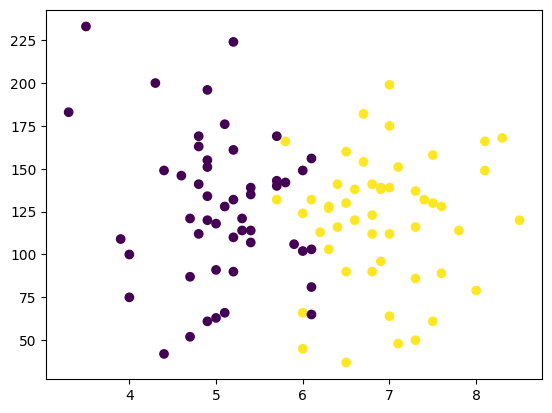

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

# L

In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
x.head()


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [ ]:
y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [ ]:
x.shape

(100,)

In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train

,cgpa,iq
87,5.7,132.0
20,6.6,120.0
99,6.2,113.0
70,6.3,127.0
76,4.9,155.0
...,...,...
65,8.1,166.0
27,6.0,124.0
97,6.7,182.0
62,6.0,102.0


now we will do scaling it not compulsory but it good to do

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[-0.28298124,  0.1822508 ],
       [ 0.49765667, -0.10316644],
       [ 0.15070649, -0.26965983],
       [ 0.23744403,  0.06332695],
       [-0.97688161,  0.72930052],
       [-0.97688161,  0.63416144],
       [-0.80340652, -1.38754404],
       [-1.84425707, -0.36479892],
       [ 2.14567005, -0.10316644],
       [ 0.06396894, -0.50750754],
       [ 1.10481949, -1.76810037],
       [ 1.97219495,  1.03850254],
       [-0.89014407, -0.79292478],
       [-0.80340652,  0.08711172],
       [ 1.10481949, -0.19830552],
       [ 0.41091912, -0.81670955],
       [ 1.36503213,  0.08711172],
       [-2.19120726,  2.58451261],
       [ 1.53850722, -0.24587506],
       [-0.71666897,  2.37044968],
       [-1.41056934, -1.95837853],
       [ 0.06396894, -1.03077249],
       [ 1.79871986,  0.5865919 ],
       [-0.1962437 ,  0.42009851],
       [-0.54319388, -0.24587506],
       [ 0.06396894, -1.41132881],
       [ 0.84460685, -1.43511358],
       [ 0.75786931, -0.67400093],
       [ 0.9313444 ,

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
'''here linear_model is module  and LogisticRegression is class
logistic regression is a classification algorithm
clf is object of LogisticRegression class'''

'here linear_model is module  and LogisticRegression is class\nlogistic regression is a classification algorithm\nclf is object of LogisticRegression class'

In [ ]:
#model traning is doing on
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#model evaluation
clf.predict(x_test)

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
y_test

,placement
2,0
13,1
45,1
85,1
28,0
84,0
63,1
88,0
58,1
12,0


you  can see on 63 my model predect wrong

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.95

to visualize the train model

<Axes: >

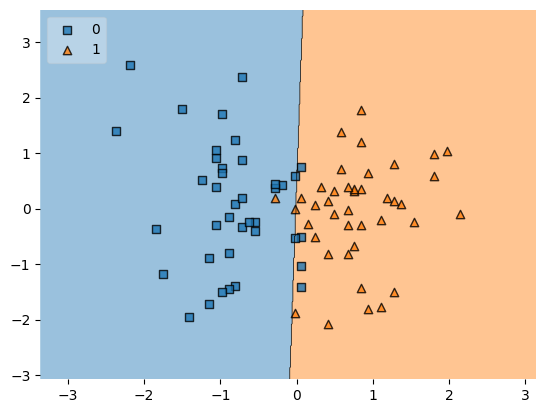

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values , clf=clf, legend=2)

In [ ]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))